In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')


### Problem 01 - Company Problem
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


#### A. Import Data

In [263]:
data_1 = pd.read_csv('Company_Data.csv')
data_2 = pd.read_csv('Company_Data.csv')
data_1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


#### B. Data Understanding

In [264]:
data_1.shape

(400, 11)

In [265]:
data_1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [266]:
data_1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [267]:
data_1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [268]:
# From the Targeted column Sales. we can observe mean and median is 7.49, so the threshold is 7.49.

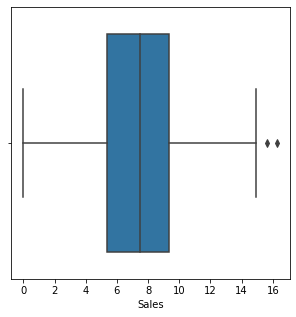

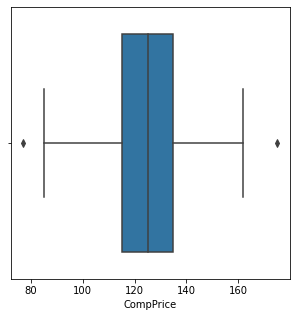

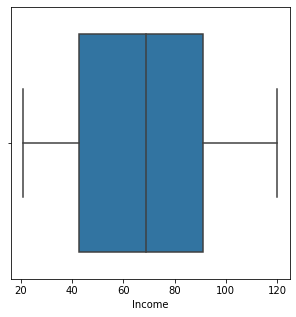

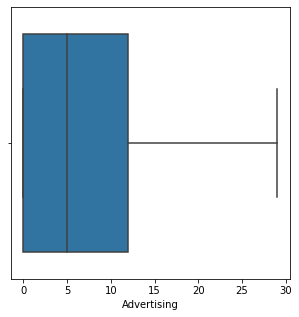

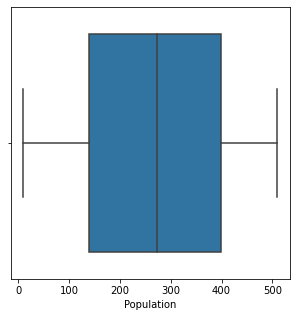

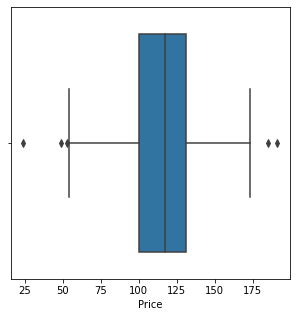

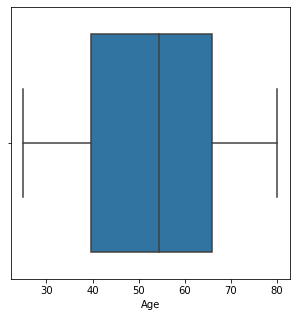

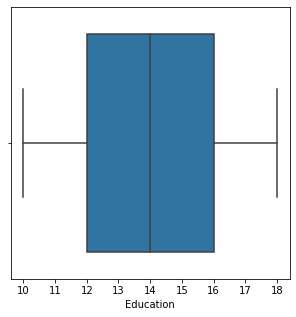

In [269]:
fig, a = plt.subplots(figsize=(5, 5))
a = sns.boxplot(data_1['Sales'])
fig, b = plt.subplots(figsize=(5, 5))
b = sns.boxplot(data_1['CompPrice'])
fig, c = plt.subplots(figsize=(5, 5))
c = sns.boxplot(data_1['Income'])
fig, d = plt.subplots(figsize=(5, 5))
d = sns.boxplot(data_1['Advertising'])
fig, e = plt.subplots(figsize=(5, 5))
e = sns.boxplot(data_1['Population'])
fig, f = plt.subplots(figsize=(5, 5))
f = sns.boxplot(data_1['Price'])
fig, g = plt.subplots(figsize=(5, 5))
g = sns.boxplot(data_1['Age'])
fig, h = plt.subplots(figsize=(5, 5))
h = sns.boxplot(data_1['Education'])

In [270]:
data_1.sort_values(by=['Sales'], ascending=False)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
376,16.27,141,60,19,319,92,Good,44,11,Yes,Yes
316,15.63,122,36,5,369,72,Good,35,10,Yes,Yes
25,14.90,139,32,0,176,82,Good,54,11,No,No
367,14.37,95,106,0,256,53,Good,52,17,Yes,No
18,13.91,110,110,0,408,68,Good,46,17,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
57,0.91,93,91,0,22,117,Bad,75,11,Yes,No
143,0.53,122,88,7,36,159,Bad,28,17,Yes,Yes
165,0.37,147,58,7,100,191,Bad,27,15,Yes,Yes
106,0.16,102,33,0,217,139,Medium,70,18,No,No


In [271]:
data_1 = data_1.drop(376)

In [272]:
data_1.sort_values(by=['Sales'], ascending=False)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
316,15.63,122,36,5,369,72,Good,35,10,Yes,Yes
25,14.90,139,32,0,176,82,Good,54,11,No,No
367,14.37,95,106,0,256,53,Good,52,17,Yes,No
18,13.91,110,110,0,408,68,Good,46,17,No,Yes
30,13.55,125,94,0,447,89,Good,30,12,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
57,0.91,93,91,0,22,117,Bad,75,11,Yes,No
143,0.53,122,88,7,36,159,Bad,28,17,Yes,Yes
165,0.37,147,58,7,100,191,Bad,27,15,Yes,Yes
106,0.16,102,33,0,217,139,Medium,70,18,No,No


In [273]:
data_1 = data_1.drop(316)

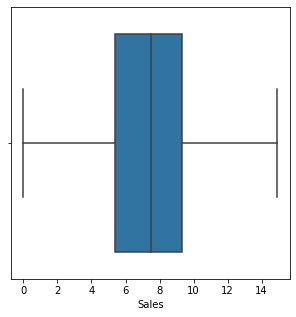

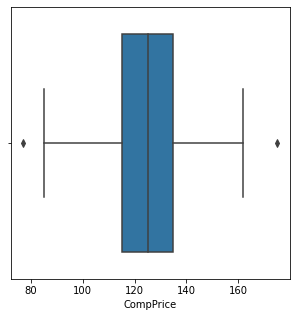

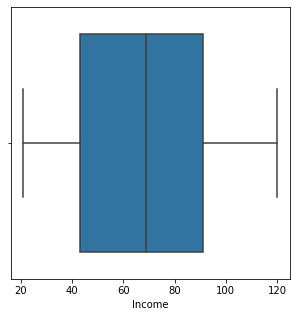

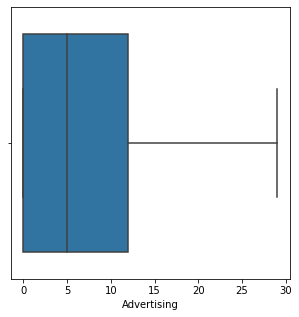

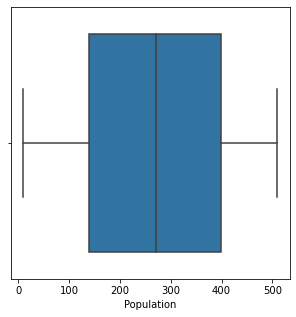

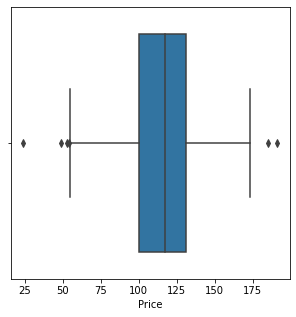

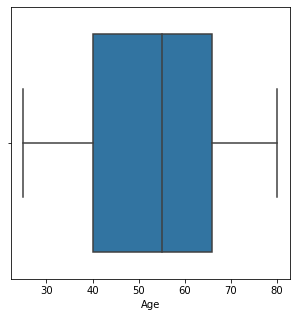

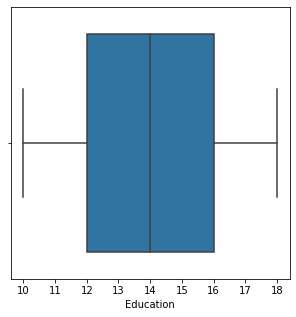

In [274]:
fig, a = plt.subplots(figsize=(5, 5))
a = sns.boxplot(data_1['Sales'])
fig, b = plt.subplots(figsize=(5, 5))
b = sns.boxplot(data_1['CompPrice'])
fig, c = plt.subplots(figsize=(5, 5))
c = sns.boxplot(data_1['Income'])
fig, d = plt.subplots(figsize=(5, 5))
d = sns.boxplot(data_1['Advertising'])
fig, e = plt.subplots(figsize=(5, 5))
e = sns.boxplot(data_1['Population'])
fig, f = plt.subplots(figsize=(5, 5))
f = sns.boxplot(data_1['Price'])
fig, g = plt.subplots(figsize=(5, 5))
g = sns.boxplot(data_1['Age'])
fig, h = plt.subplots(figsize=(5, 5))
h = sns.boxplot(data_1['Education'])

In [275]:
data_1.sort_values(by=['CompPrice'], ascending=False)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
310,9.53,175,65,29,419,166,Medium,53,12,Yes,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
206,4.97,162,67,0,27,160,Medium,77,17,Yes,Yes
97,7.45,161,82,5,287,129,Bad,33,16,Yes,Yes
240,10.31,159,80,0,362,121,Medium,26,18,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
70,9.46,89,81,15,237,99,Good,74,12,Yes,Yes
75,8.55,88,111,23,480,92,Bad,36,16,No,Yes
208,7.78,86,54,0,497,64,Bad,33,12,Yes,No
44,4.16,85,79,6,325,95,Medium,69,13,Yes,Yes


In [276]:
data_1 = data_1.drop([310,42])

In [277]:
data_1_corr = round(data_1.corr(),1)

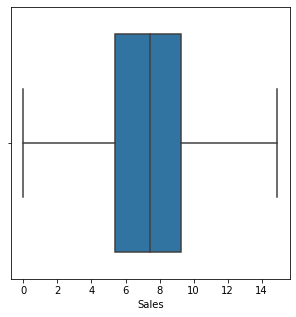

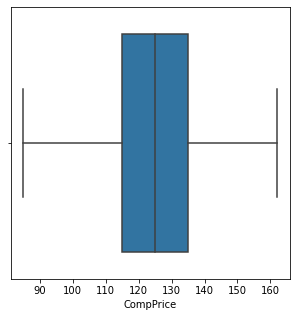

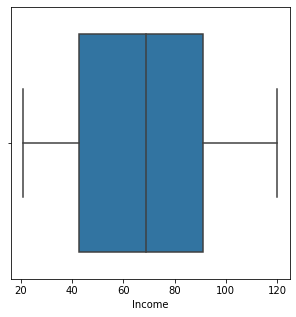

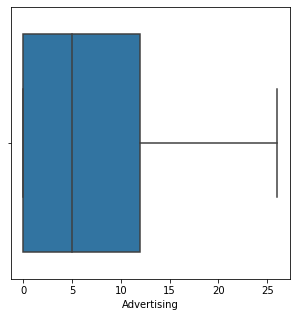

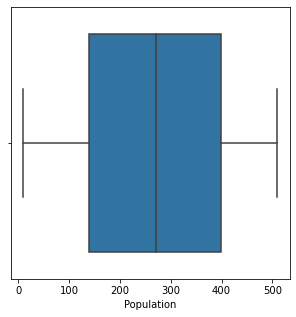

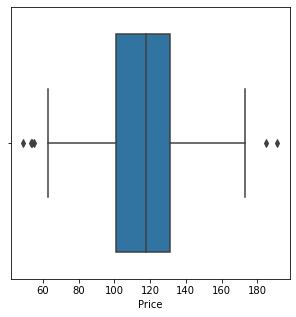

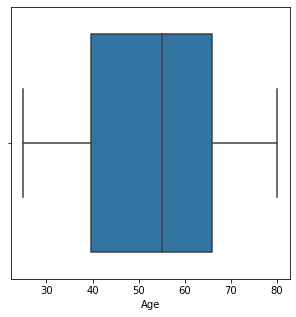

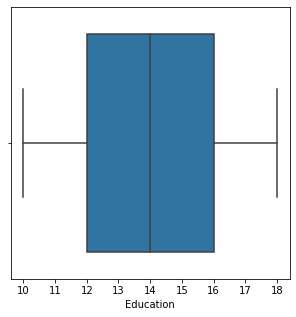

In [279]:
fig, a = plt.subplots(figsize=(5, 5))
a = sns.boxplot(data_1['Sales'])
fig, b = plt.subplots(figsize=(5, 5))
b = sns.boxplot(data_1['CompPrice'])
fig, c = plt.subplots(figsize=(5, 5))
c = sns.boxplot(data_1['Income'])
fig, d = plt.subplots(figsize=(5, 5))
d = sns.boxplot(data_1['Advertising'])
fig, e = plt.subplots(figsize=(5, 5))
e = sns.boxplot(data_1['Population'])
fig, f = plt.subplots(figsize=(5, 5))
f = sns.boxplot(data_1['Price'])
fig, g = plt.subplots(figsize=(5, 5))
g = sns.boxplot(data_1['Age'])
fig, h = plt.subplots(figsize=(5, 5))
h = sns.boxplot(data_1['Education'])

<AxesSubplot:>

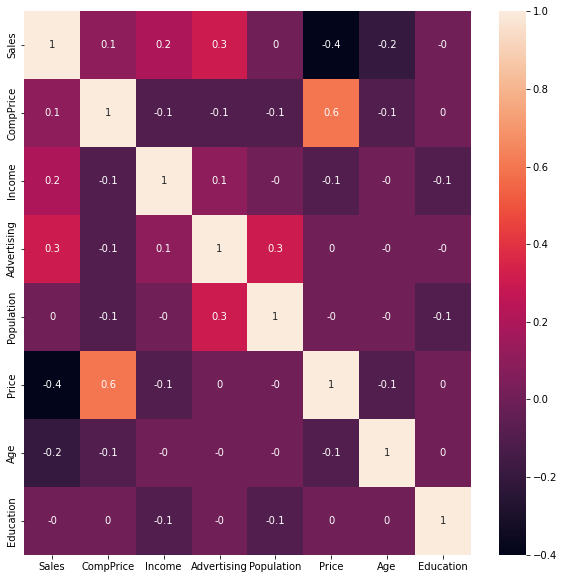

In [280]:
plt.figure(figsize=(10,10))
sns.heatmap(data_1_corr,annot=True)

#### C. Data Preparation

In [281]:
data_1["sales"]="small"

In [282]:
data_1.loc[data_1["Sales"]>7.49,"sales"]="large"

In [283]:
data_1.drop(["Sales"],axis=1,inplace=True)

In [284]:
data_1 = pd.get_dummies(data_1, columns = ['ShelveLoc','US','Urban'])

In [285]:
X = data_1.drop(labels='sales',axis=1)
y = data_1[['sales']]

In [286]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=12,shuffle=True)

#### D. Model Building

#### 1. Random Forest

In [287]:
rf_classifier_1 = RandomForestClassifier()
rf_classifier_1.fit(X_train,y_train)

RandomForestClassifier()

In [288]:
y_train_pred_rf = rf_classifier_1.predict(X_train)

In [289]:
accuracy_score(y_train,y_train_pred_rf)

1.0

In [290]:
print(classification_report(y_train,y_train_pred_rf))

              precision    recall  f1-score   support

       large       1.00      1.00      1.00       153
       small       1.00      1.00      1.00       163

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316



In [291]:
print(confusion_matrix(y_train,y_train_pred_rf))

[[153   0]
 [  0 163]]


In [292]:
y_test_pred_rf = rf_classifier_1.predict(X_test)

In [293]:
print(accuracy_score(y_test,y_test_pred_rf))

0.75


In [294]:
print('Classification Report:\n',classification_report(y_test,y_test_pred_rf))

Classification Report:
               precision    recall  f1-score   support

       large       0.78      0.74      0.76        42
       small       0.72      0.76      0.74        38

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



In [295]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred_rf))

Confusion Matrix:
 [[31 11]
 [ 9 29]]


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26840d8d910>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x268410b34f0>)

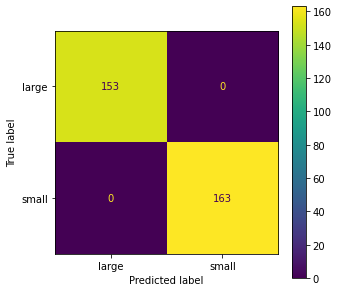

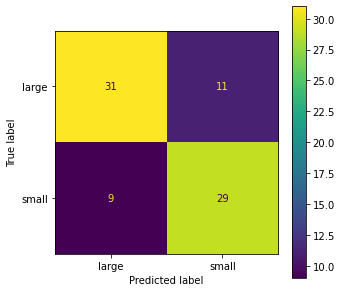

In [296]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf_classifier_1,X_train,y_train, ax = ax), plot_confusion_matrix(rf_classifier_1,X_test,y_test, ax = bx)

#### from above we can observe that training accuracy is 100% while test accuracy is 75 % for the Random Forest Classifier. 
#### Model is clearly overfitted we can tackle this over fitting problem by using GridSearchCV.

#### 2. Gradient Boosting

In [297]:
gb_classifier_1 = GradientBoostingClassifier()
gb_classifier_1.fit(X_train,y_train)

GradientBoostingClassifier()

In [298]:
y_train_pred_gb = gb_classifier_1.predict(X_train)

In [299]:
accuracy_score(y_train,y_train_pred_gb)

0.9936708860759493

In [300]:
print(classification_report(y_train,y_train_pred_gb))

              precision    recall  f1-score   support

       large       0.99      1.00      0.99       153
       small       1.00      0.99      0.99       163

    accuracy                           0.99       316
   macro avg       0.99      0.99      0.99       316
weighted avg       0.99      0.99      0.99       316



In [301]:
print(confusion_matrix(y_train,y_train_pred_gb))

[[153   0]
 [  2 161]]


In [302]:
y_test_pred_gb = gb_classifier_1.predict(X_test)

In [303]:
print(accuracy_score(y_test,y_test_pred_gb))

0.8125


In [304]:
print('Classification Report:\n',classification_report(y_test,y_test_pred_rf))

Classification Report:
               precision    recall  f1-score   support

       large       0.78      0.74      0.76        42
       small       0.72      0.76      0.74        38

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



In [305]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred_gb))

Confusion Matrix:
 [[34  8]
 [ 7 31]]


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26842f4feb0>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26842f3ab50>)

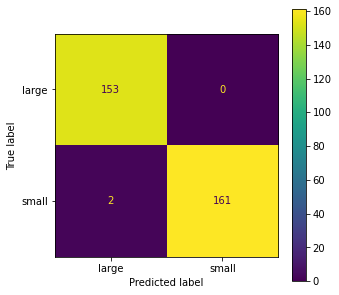

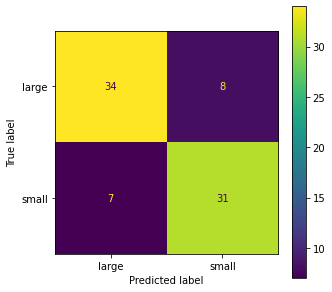

In [306]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(gb_classifier_1,X_train,y_train, ax = ax), plot_confusion_matrix(gb_classifier_1,X_test,y_test, ax = bx)

#### from above we can observe that training accuracy is 99% while test accuracy is 81.25% for The Gradient Boosting Model. 
#### Model is clearly overfitted we can tackle this over fitting problem by using GridSearchCV.

#### 1. Random Forest

In [307]:
data_2["sales"]="small"

In [308]:
data_2.loc[data_2["Sales"]>7.49,"sales"]="large"

In [309]:
data_2.drop(["Sales"],axis=1,inplace=True)

In [310]:
data_2 = pd.get_dummies(data_2, columns = ['ShelveLoc','US','Urban'])

In [311]:
X_2 = data_2.drop(labels='sales',axis=1)
y_2 = data_2[['sales']]

In [312]:
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_2,y_2,test_size = 0.20,random_state=12,shuffle=True)

In [313]:
rf_classifier_2 = RandomForestClassifier()
rf_classifier_2.fit(X_train_2,y_train_2)

RandomForestClassifier()

In [314]:
y_train_pred_rf_2 = rf_classifier_2.predict(X_train_2)

In [315]:
accuracy_score(y_train_2,y_train_pred_rf_2)

1.0

In [316]:
print(classification_report(y_train_2,y_train_pred_rf_2))

              precision    recall  f1-score   support

       large       1.00      1.00      1.00       159
       small       1.00      1.00      1.00       161

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [317]:
print(confusion_matrix(y_train_2,y_train_pred_rf_2))

[[159   0]
 [  0 161]]


In [318]:
y_test_pred_rf_2 = rf_classifier_2.predict(X_test_2)

In [319]:
print(accuracy_score(y_test_2,y_test_pred_rf_2))

0.8125


In [320]:
print('Classification Report:\n',classification_report(y_test_2,y_test_pred_rf_2))

Classification Report:
               precision    recall  f1-score   support

       large       0.90      0.70      0.79        40
       small       0.76      0.93      0.83        40

    accuracy                           0.81        80
   macro avg       0.83      0.81      0.81        80
weighted avg       0.83      0.81      0.81        80



In [321]:
print('Confusion Matrix:\n',confusion_matrix(y_test_2,y_test_pred_rf_2))

Confusion Matrix:
 [[28 12]
 [ 3 37]]


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x268430ab7c0>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26843130100>)

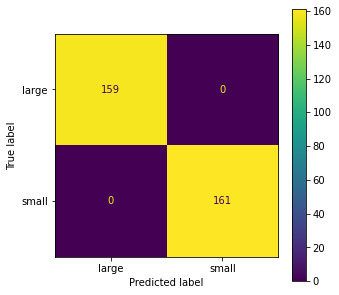

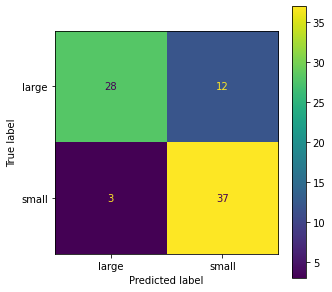

In [322]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf_classifier_2,X_train_2,y_train_2, ax = ax), plot_confusion_matrix(rf_classifier_2,X_test_2,y_test_2, ax = bx)

#### from above we can observe that training accuracy is 100% while test accuracy is 81.25 % for the Random Forest Classifier. 
#### Model is clearly overfitted we can tackle this over fitting problem by using GridSearchCV.

#### 2. Gradient Boosting

In [323]:
gb_classifier_2 = GradientBoostingClassifier()
gb_classifier_2.fit(X_train_2,y_train_2)

GradientBoostingClassifier()

In [324]:
y_train_pred_gb_2 = gb_classifier_2.predict(X_train_2)

In [325]:
accuracy_score(y_train_2,y_train_pred_gb_2)

0.990625

In [326]:
print(classification_report(y_train_2,y_train_pred_gb_2))

              precision    recall  f1-score   support

       large       0.99      0.99      0.99       159
       small       0.99      0.99      0.99       161

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



In [327]:
print(confusion_matrix(y_train_2,y_train_pred_gb_2))

[[157   2]
 [  1 160]]


In [328]:
y_test_pred_gb_2 = gb_classifier_2.predict(X_test_2)

In [329]:
print(accuracy_score(y_test_2,y_test_pred_gb_2))

0.8375


In [330]:
print('Classification Report:\n',classification_report(y_test_2,y_test_pred_gb_2))

Classification Report:
               precision    recall  f1-score   support

       large       0.86      0.80      0.83        40
       small       0.81      0.88      0.84        40

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26843360130>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26843340eb0>)

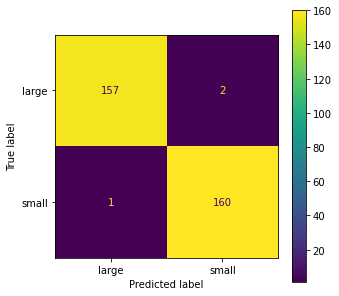

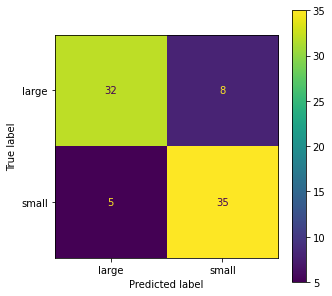

In [331]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(gb_classifier_2,X_train_2,y_train_2, ax = ax), plot_confusion_matrix(gb_classifier_2,X_test_2,y_test_2, ax = bx)

#### from above we can observe that training accuracy is 99% while test accuracy is 83.75% for The Gradient Boosting Model. 
#### Model is clearly overfitted we can tackle this over fitting problem by using GridSearchCV.

### By dropping outliers accuracy is reduced

### Conclusion - 